In [1]:
import numpy as np
import pandas as pd 
import math

In [2]:
from sklearn import datasets, tree
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [4]:
featuresData = pd.read_csv("../dataset./feature_regression_example.csv")

In [5]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [6]:
featuresData["HD_YN"] = np.where(featuresData["HOLIDAY"] == "Y", 1, np.where(featuresData["HOLIDAY"]=="N",0,featuresData["HOLIDAY"]))
featuresData["PM_YN"] = np.where(featuresData["PROMOTION"] == "Y", 1, 0)

In [7]:
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HD_YN,PM_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


In [8]:
featuresData2 = featuresData[(featuresData.YEARWEEK.astype(int)>=201501) & (featuresData.YEARWEEK.astype(int)<=201652)]

## 01 상관관계 확인

In [9]:
corrDf = featuresData2.corr()
corrDf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,PM_YN
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.898554
PM_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,1.000000


In [10]:
# 인덱스컬럼 초기화
corrResult = corrDf.reset_index()
corrResult

,index,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,PM_YN
0,YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.205916
1,YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,0.195931
2,WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.060206
3,QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.612451
4,HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.374072
5,PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.898554
6,PM_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,1.000000


In [11]:
# 상관관계 계수 비율 선정
featuresStd = 0.5

# feature 선택
features = corrResult[(corrResult.QTY != 1)\
                      &(abs(corrResult.QTY)>featuresStd)]["index"].tolist()
features

['HCLUS', 'PRO_PERCENT', 'PM_YN']

In [12]:
label = ["QTY"]
label

['QTY']

## 02 특성 선정

In [13]:
yearweekStd = 201630

In [14]:
# 학습하려면 1,2번 사용이 적합

trainingData_features = featuresData2[featuresData2.YEARWEEK <= yearweekStd][features]
trainingData_label = featuresData2[featuresData2.YEARWEEK <= yearweekStd][label]
testData_features = featuresData2[featuresData2.YEARWEEK > yearweekStd][features]
testData_label = featuresData2[featuresData2.YEARWEEK > yearweekStd]

In [15]:
testData_label = testData_label.reset_index(drop=True)
testData_label

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HD_YN,PM_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1


In [16]:
### 디시전트리
# Define Model
model_method = tree.DecisionTreeRegressor()

# Learning (학습지표 & 결과값)
model = model_method.fit(trainingData_features,trainingData_label)

model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [17]:
# Define Model
model_method2 = LinearRegression()

# Learning (학습지표 & 결과값)
model2 = model_method2.fit(trainingData_features,trainingData_label)

model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# 예측
predict = model.predict(testData_features)
predict

array([1606.5       , 1606.5       ,  350.71428571, 1434.6       ,
       1434.6       , 1434.6       , 1434.6       , 1434.6       ,
       1606.5       , 1606.5       , 2620.42857143, 1606.5       ,
        350.71428571, 2193.8       , 2193.8       , 2193.8       ,
       2193.8       , 2193.8       , 1434.6       , 1434.6       ,
       1434.6       , 1434.6       ])

In [19]:
predict2 = model2.predict(testData_features)
predict2

array([[1375.69926506],
       [1375.69926506],
       [ 303.991336  ],
       [1967.37842513],
       [1967.37842513],
       [1967.37842513],
       [1532.2588619 ],
       [1532.2588619 ],
       [1375.69926506],
       [1375.69926506],
       [1665.77897389],
       [1375.69926506],
       [ 303.991336  ],
       [2738.65667242],
       [2738.65667242],
       [2738.65667242],
       [2738.65667242],
       [2738.65667242],
       [2158.49725478],
       [1774.21460448],
       [1774.21460448],
       [2209.33416771]])

In [20]:
predictData = pd.DataFrame(predict, columns=["PREDICT"])

predictData

,PREDICT
0,1606.500000
1,1606.500000
2,350.714286
3,1434.600000
4,1434.600000
5,1434.600000
6,1434.600000
7,1434.600000
8,1606.500000
9,1606.500000


In [21]:
predictData2 = pd.DataFrame(predict2, columns=["PREDICT2"])

predictData2

,PREDICT2
0,1375.699265
1,1375.699265
2,303.991336
3,1967.378425
4,1967.378425
5,1967.378425
6,1532.258862
7,1532.258862
8,1375.699265
9,1375.699265


In [22]:
testData = pd.concat([testData_label, predictData, predictData2], axis=1)

In [23]:
testData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HD_YN,PM_YN,PREDICT,PREDICT2
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,1606.500000,1375.699265
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,1606.500000,1375.699265
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,350.714286,303.991336
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,1434.600000,1967.378425
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,1434.600000,1967.378425
5,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1,1434.600000,1967.378425
6,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,0,1,1434.600000,1532.258862
7,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,0,1,1434.600000,1532.258862
8,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,0,1,1606.500000,1375.699265
9,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,0,1,1606.500000,1375.699265


## 03 모델 적용

In [24]:
### MAE
# 실제값과 예측값의 평균오차
mean_absolute_error(testData['QTY'], testData['PREDICT'])

### RMSE (MSE)
# 예측값 오차를 제곱 -> 평균 -> 루트
# 예측값 에러 잡기.
# MAE와 RMSE값 차이가 심하면, 안정적 모델이 아님. 쓸모없는 모델. useless
mean_squared_error(testData['QTY'], testData['PREDICT'])

### R2
r2_score(testData['QTY'], testData['PREDICT']) 

0.5144917252719985

In [25]:
mean_absolute_error(testData['QTY'], testData['PREDICT'])

402.7435064935065

In [26]:
math.sqrt(mean_squared_error(testData['QTY'], testData['PREDICT']))

476.11553668877247

In [27]:
r2_score(testData['QTY'], testData['PREDICT']) 

0.5144917252719985

In [30]:
mean_absolute_error(testData['QTY'], testData['PREDICT2'])

558.0670525726194

In [31]:
math.sqrt(mean_squared_error(testData['QTY'], testData['PREDICT2']))

713.5569550837886

In [32]:
r2_score(testData['QTY'], testData['PREDICT2']) 

-0.09050890413294899

## 결과 검증 (정확도 측정)

In [28]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [29]:
# dot_data = StringIO()
# export_graphviz(model, out_file=dot_data, 
#                 rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [33]:
import matplotlib.pyplot as plt

In [35]:
%matplotlib inline
x = testData["YEARWEEK"]
y = testData["QTY"]         # 여러개의 선을 그릴 수 있다. 
y2 = testData["PREDICT"]         # for문 역전시켜서 list에 적용가능.(ONLY 파이썬)
y3 = testData["PREDICT2"]

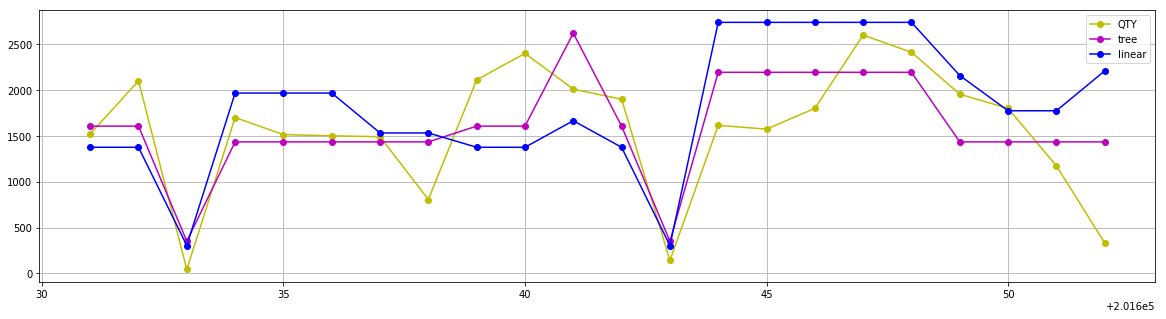

In [43]:
fig = plt.figure(figsize=(20,5))  
plt.plot(x,y,"yo-", label="QTY")
plt.plot(x,y2,"mo-", label="tree")
plt.plot(x,y3,"bo-", label="linear")
plt.grid(True)
plt.legend(loc=0)